# Introduction
* To predict the personality types(introverts and extroverts), we use machine learning techniques applied to binary classification.
* Given data set has various features that helps to distinguish between the two personality types, but the target column has imbalanced data, with approximately 75% of instances labelled as extroverts. 
* Understanding and addressing this imbalance is critical to building a robust predictive model.
  
__About Personality Classification and the Dataset:__
* Personality classification involves in using peoples bahaviour, personal details to categorize indivisuals as introverts or extroverts.
* The dataset contains features relevant to personality traits, which will be explored through Exploratory Data Analysis (EDA) to understand their distributions and relationships.
* Due to the biased target column, it is necessary to preprocessing the data to represent both classes unbiased.

__What We Analyze and Why It Matters:__
* The analysis focuses on developing a binary classification model to predict whether an individual is an introvert or an extrovert based on the dataset’s features.
* This involves performing EDA to uncover patterns, cleaning the data by handling missing values and outliers, and applying feature engineering to enhance predictive power.
* To address the class imbalance, techniques such as SMOTE (Synthetic Minority Oversampling Technique) is used.
* The model’s performance will be evaluated using metrics like accuracy, precision, recall, F1-score, ROC-AUC score, and a confusion matrix to ensure reliable predictions.
* By carefully preprocessing the data, addressing class imbalance, and selecting an appropriate algorithm (Logistic Regression), to deliver a high-performing model.

**Importing Libraries**

In [3]:
# import the packages
import pandas as pd
import numpy as np

# import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

# import statistical testing library
from scipy.stats import normaltest

# import data preprocessing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# import modelling library
from sklearn.linear_model import LogisticRegression

# import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

**Read the dataset:**

In [5]:
df = pd.read_csv(r"C:\Users\91891\Downloads\playground-series-s5e7\train.csv", index_col="id")

In [6]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [7]:
# Copy the original dataset
df_copy = df

In [8]:
# Retrive first five rows of dataset
df_copy

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert


In [9]:
# Returns the dimensions of the dataset as a tuple (rows, columns).
df_copy.shape

(18524, 8)

# Basic understanding of each feature
* id: Unique identifier each row.
* Time_spent_Alone: Hours representing how much time a person spents alone.
* Stage_fear: Indicates if the person has fear infront of others(YES/NO).
* Social_event_attendance: Frequency of attending social events.
* Going_outside: Frequency of going outside.
* Drained_after_socializing: Whether the person feels drained after socializing(YES/NO).
* Friends_circle_size: Number of friends connections.
* Post_frequency: Frequency of posting on social media.
* Personality(Target): The target label(Introvert/Extrovert)

# Data Preprocessing

**Exploratory Data Analysis(EDA)**

In [13]:
# Displays the column names
df_copy.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [14]:
# Displays the summary of the data set
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [15]:
# Displays descriptive statistics of numerical columns in the dataset, summarizing count, mean, standard deviation, min, max, and quartiles.
df_copy.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [16]:
# Calculates the total number of duplicate rows in the dataset.
df_copy.duplicated().sum()

0

In [17]:
# Returns the count of missing values for each column in the dataset.
df_copy.isnull().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [18]:
# Returns the count of each unique value in the "Personality" column .
df_copy.Personality.value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

**Identyfied numerical and categorical columns with data types and printed the numerical and categorical features.**

In [20]:
numerical_columns = ["Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]

categorical_columns = ["Stage_fear", "Drained_after_socializing", "Personality"]

**Created a count plot to visualize the frequency of each class in the "Personality column" with title "Class Distribution".**

Text(0.5, 1.0, 'Class Distribution')

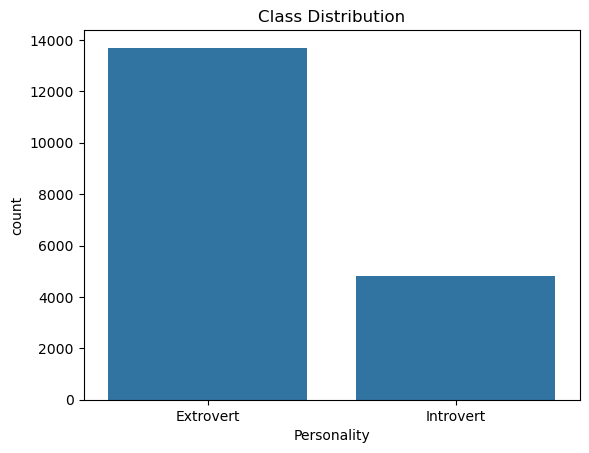

In [22]:
sns.countplot(x='Personality', data=df_copy)

plt.title("Class Distribution")

**Insights gained:**
* In the above plot, the class extrovert has almost 75% of instances.
* We can observe that, data is biased.

**Created histograms for all numerical columns in the dataset to visualize the distributions.**

array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>, <Axes: >]],
      dtype=object)

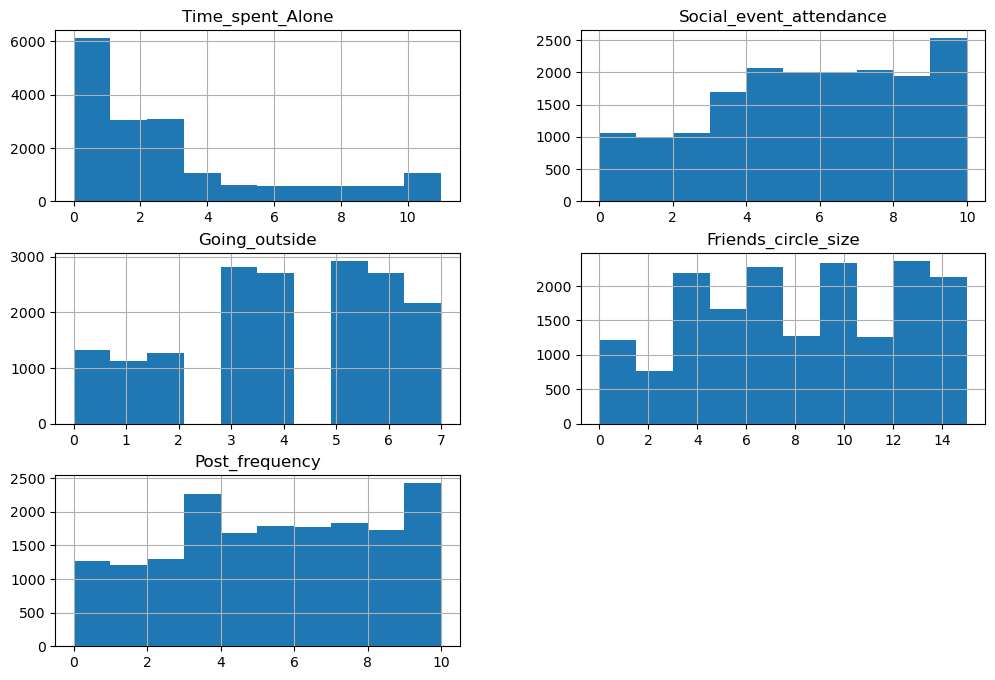

In [25]:
df_copy.hist(figsize=(12, 8))

**Generated a heatmap to visualize the correlation between the numerical features.**

<Axes: >

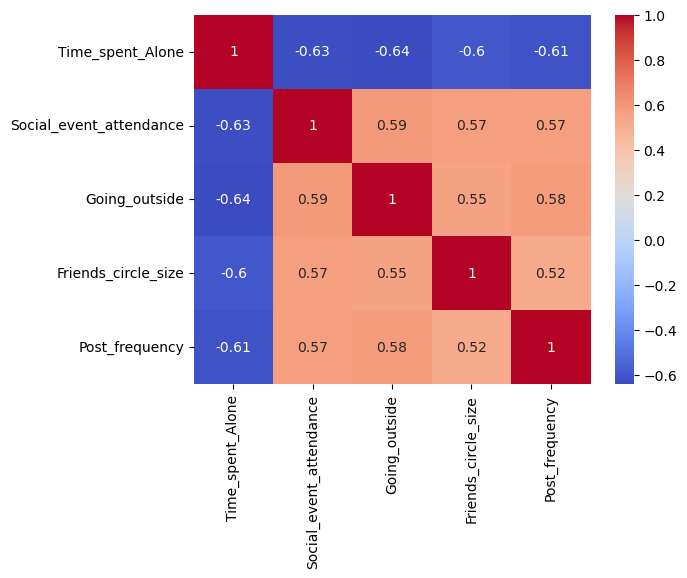

In [27]:
sns.heatmap(df_copy.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

**Insights gained:**
* No features are strongly correlated, so no need removing features.
* Hence, it is safe to use Logistic Regression.

**Encode the Categorical Columns with 0 and 1, SMOTE requires numeric targets.**

In [30]:
# Encode categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df_copy[col] = le.fit_transform(df_copy[col])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,0,6.0,4.0,0,15.0,5.0,0
1,1.0,0,7.0,3.0,0,10.0,8.0,0
2,6.0,1,1.0,0.0,2,3.0,0.0,1
3,3.0,0,7.0,3.0,0,11.0,5.0,0
4,1.0,0,4.0,4.0,0,13.0,NaN,0


**Insights gained:**
* Categorical columns are encoded with 0 and 1.

**Created distributed visualizations using histogram for all numerical columns in the dataset.**

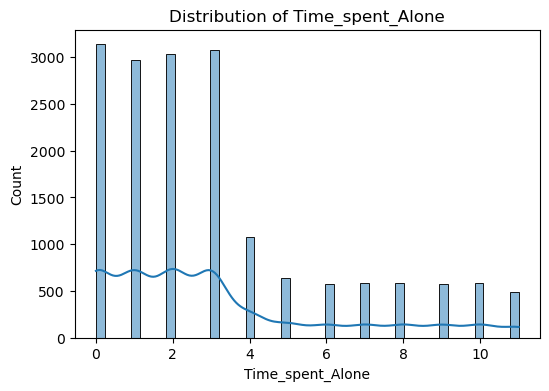

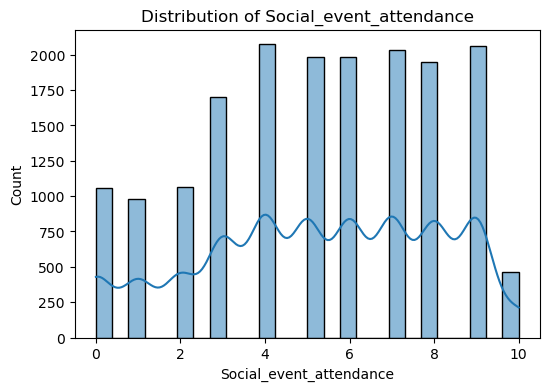

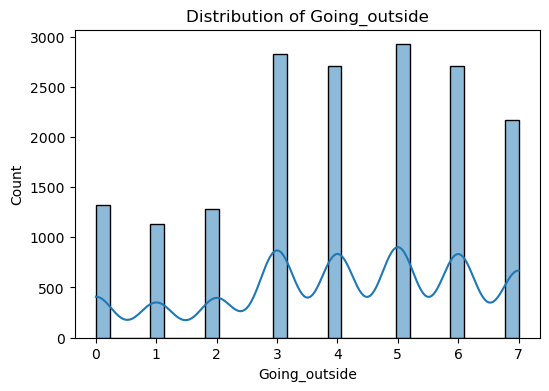

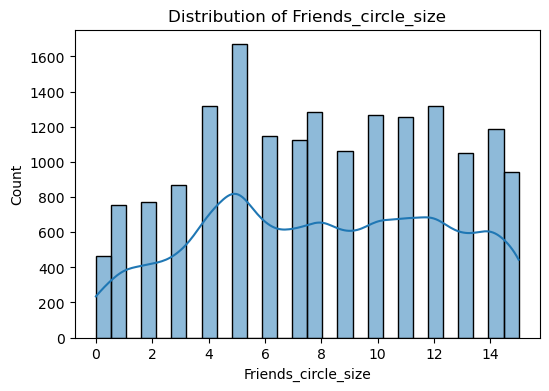

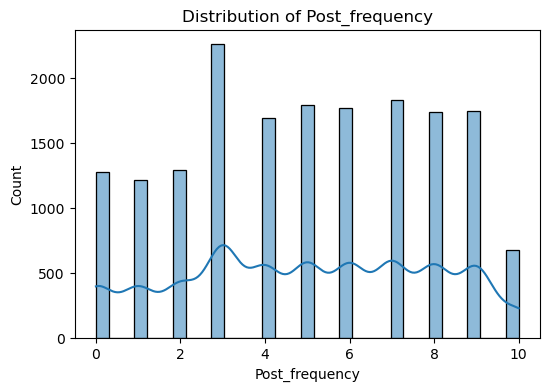

In [33]:
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_copy[col], kde=True)  
    plt.title(f"Distribution of {col}")
    plt.show()

**Insights gained:**
* Time_spent_Alone: Distribution shows moderate spread with some high-value outliers → a few users spend far more time alone than typical.
* Friends_circle_size: Right-skewed, with extreme outliers → a small group of users has very large friend circles compared to the rest.
* Post_frequency: Highly skewed with many outliers → most users post at moderate levels, but some are heavy posters.
* Social_event_attendance: Spread is moderate, fewer extreme outliers, suggesting consistent behavior among users.
* Stage_fear & Drained_after_socializing: Lower spread, fewer outliers → indicates more consistent patterns across individuals.

**D’Agostino & Pearson normality test to check the normality.**

In [36]:
results = []
for col in numerical_columns:
    stat, p = normaltest(df_copy[col].dropna())
    results.append((col, stat, p, "Normal" if p > 0.05 else "Not Normal"))

import pandas as pd
results_df = pd.DataFrame(results, columns=["Column", "Statistic", "p-value", "Conclusion"])
print(results_df)

                    Column    Statistic  p-value  Conclusion
0         Time_spent_Alone  2534.207393      0.0  Not Normal
1  Social_event_attendance  2846.280192      0.0  Not Normal
2            Going_outside  1682.573664      0.0  Not Normal
3      Friends_circle_size  6350.771508      0.0  Not Normal
4           Post_frequency  5939.187175      0.0  Not Normal


**Insights gained:**
* Numerical columns are not normally distributed.

**Filling null values for numerical columns based on the distributuion type either mean/median imputation and categorical columns are filled with most_frequent imputation**

In [39]:
# Loop through each numerical column
for col in numerical_columns:
    # D’Agostino and Pearson’s Test for normality
    stat, p = normaltest(df_copy[col].dropna())   # dropna() because test can't handle NaN
    
    if p > 0.05:
        # Data is normally distributed → use mean
        imputer = SimpleImputer(strategy='mean')
        df_copy[[col]] = imputer.fit_transform(df_copy[[col]])
        print(f"{col}: Normally distributed, Mean Imputation applied")
    else:
        # Data is not normally distributed → use median
        imputer = SimpleImputer(strategy='median')
        df_copy[[col]] = imputer.fit_transform(df_copy[[col]])
        print(f"{col}: Not normally distributed, Median Imputation applied")

# Impute categorical columns with most frequent value (mode)
imputer = SimpleImputer(strategy="most_frequent")
df_copy[categorical_columns] = imputer.fit_transform(df_copy[categorical_columns])

# Check first few rows
df_copy.head(5)

Time_spent_Alone: Not normally distributed, Median Imputation applied
Social_event_attendance: Not normally distributed, Median Imputation applied
Going_outside: Not normally distributed, Median Imputation applied
Friends_circle_size: Not normally distributed, Median Imputation applied
Post_frequency: Not normally distributed, Median Imputation applied


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,0,6.0,4.0,0,15.0,5.0,0
1,1.0,0,7.0,3.0,0,10.0,8.0,0
2,6.0,1,1.0,0.0,2,3.0,0.0,1
3,3.0,0,7.0,3.0,0,11.0,5.0,0
4,1.0,0,4.0,4.0,0,13.0,5.0,0


**Insights gained:**
* Numerical features are not normally distributed.
* So, imputed with median.

**Checking null values count after data cleaning.**

In [42]:
df_copy.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

**Boxplot to check outliers and data distributions.**

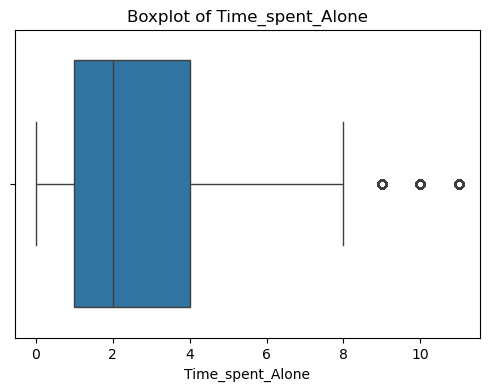

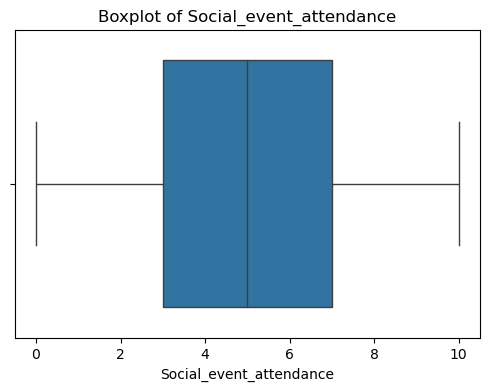

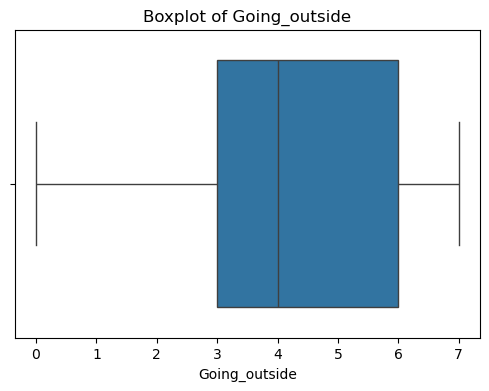

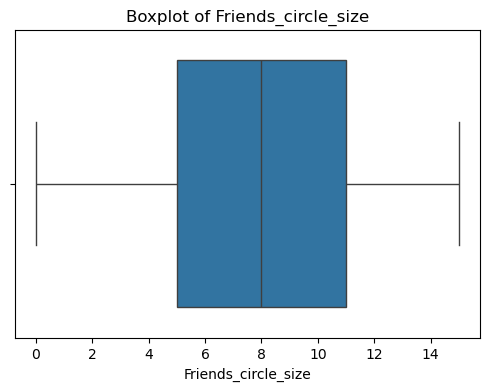

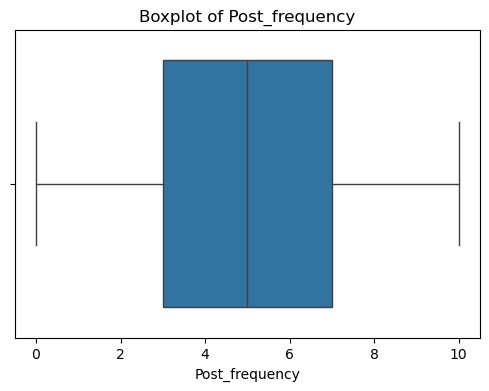

In [44]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_copy[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

**IQR(Interquartile Range) method for outlier detection and treatment**

In [46]:
# Loop through each numerical column
for col in numerical_columns:
    Q1 = df_copy[col].quantile(0.25)   # 25th percentile
    Q3 = df_copy[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the bounds
    df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

df_copy = df_copy.reset_index(drop=True)
  
    # Print only once, after all columns are processed
print("Shape after outlier treatment:", df.shape)
print("\nUpdated Dataset (first 5 rows):")
print(df_copy.head())
print("\nSummary statistics after outlier treatment:")
df_copy[numerical_columns].describe()

Shape after outlier treatment: (18524, 8)

Updated Dataset (first 5 rows):
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               0.0           0                      6.0            4.0   
1               1.0           0                      7.0            3.0   
2               6.0           1                      1.0            0.0   
3               3.0           0                      7.0            3.0   
4               1.0           0                      4.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 15.0             5.0            0  
1                          0                 10.0             8.0            0  
2                          2                  3.0             0.0            1  
3                          0                 11.0             5.0            0  
4                          0                 13.0             5.0    

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000
mean,2.390018,5.566712,4.279355,8.463043,5.303064
std,2.047418,2.530814,1.864853,3.939290,2.661493
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,3.000000,5.000000,3.000000
50%,2.000000,6.000000,4.000000,8.000000,5.000000
75%,3.000000,8.000000,6.000000,12.000000,7.000000
max,8.000000,10.000000,7.000000,15.000000,10.000000


**Insights gained:**
* Extreme values beyond the calculated lower and upper bounds (Q1 – 1.5×IQR, Q3 + 1.5×IQR) were removed for each numerical feature.
* After outlier treatment, the dataset became cleaner, less skewed, and more reliable for training.
* Removing outliers makes the data more robust for training machine learning models, especially Logistic Regression (which can be sensitive to extreme values).

**Again encoding categorical features to numerical features, if there are any categorical features present after IQR based outlier**

In [49]:
df_copy = pd.get_dummies(df_copy, drop_first=True)
df_copy.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,6.0,4.0,0,15.0,5.0,0
1,1.0,0,7.0,3.0,0,10.0,8.0,0
2,6.0,1,1.0,0.0,2,3.0,0.0,1
3,3.0,0,7.0,3.0,0,11.0,5.0,0
4,1.0,0,4.0,4.0,0,13.0,5.0,0


In [50]:
df_copy.shape

(16871, 8)

**Insights gained:**
* All the categorical columns are converted into numeric(i.e., string to numeric).

In [52]:
df_copy.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

**Scaling technique is used to standardizes numerical features**
* Standardizes all numerical columns → making them comparable on the same scale (mean=0, std=1), which is very important before applying ML models.
* Centers data around mean = 0
* Scales so that std = 1
* Values can be negative or positive (depending on whether below or above mean).

In [54]:
scaler = StandardScaler()
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])
df_copy[numerical_columns].head(5)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,-1.167368,0.171210,-0.149805,1.659474,-0.113873
1,-0.678933,0.566352,-0.686056,0.390172,1.013347
2,1.763240,-1.804498,-2.294809,-1.386850,-1.992574
3,0.297936,0.566352,-0.686056,0.644033,-0.113873
4,-0.678933,-0.619073,-0.149805,1.151754,-0.113873


**Insights gained:**
* All numerical features are now on the same scale between -3 and +3, centered around 0.
* Features with higher original ranges no longer dominate the model.
* This is crucial for algorithms sensitive to feature magnitude (e.g., Logistic Regression).

In [56]:
df_copy.shape

(16871, 8)

**Ensure Features Are Numeric, all features must be numeric for SMOTE**

In [126]:
# Drop target from features
X = df_copy.drop("Personality", axis=1)

# If there are categorical features, create dummy variables
X = pd.get_dummies(X, drop_first=True)
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,-1.167368,0,0.171210,-0.149805,0,1.659474,-0.113873
1,-0.678933,0,0.566352,-0.686056,0,0.390172,1.013347
2,1.763240,1,-1.804498,-2.294809,2,-1.386850,-1.992574
3,0.297936,0,0.566352,-0.686056,0,0.644033,-0.113873
4,-0.678933,0,-0.619073,-0.149805,0,1.151754,-0.113873
...,...,...,...,...,...,...,...
16866,0.297936,0,0.566352,-0.686056,0,0.136312,0.637607
16867,-0.678933,2,0.171210,1.458949,0,-0.625269,-0.113873
16868,2.251674,1,-1.804498,-1.758558,1,-1.894571,-0.113873
16869,-0.190498,1,-1.804498,-2.294809,1,-0.879130,-1.241094


In [59]:
y = df_copy["Personality"]

**Split into Training and Test Sets**
* stratify=y: ensures class balance, because original dataset is imbalanced.
* test_size=0.2: Using 20% for testing gives enough unseen data to evaluate model performance reliably.
* random_state=42: Setting random_state guarantees that your results can be replicated in future runs.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# print(X_train.head(5))
# print(X_test.head(5))
# print(y_train[:5])
print(y_test[:5])

4917     1
13319    0
1407     1
13121    0
12577    0
Name: Personality, dtype: int32


In [62]:
# type(X_train)
# type(X_test)
type(y_train)
type(y_test)

pandas.core.series.Series

**Apply SMOTE (Synthetic Minority Oversampling Technique) to address the classs imbalance**

In [64]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check class balance
print("Before SMOTE:\n", pd.Series(y_train).value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())

Before SMOTE:
 Personality
0    10871
1     2625
Name: count, dtype: int64
After SMOTE:
 Personality
0    10871
1    10871
Name: count, dtype: int64


**Insights gained:**
* Created synthetic samples of the minority class(introvert) by interpolating between minority samples.
* Both classes are now balanced(both intoverts and extroverts).
* This ensures the model, learns eqaully from both classes.

# Model Development 

**Logistic regression used for binary classification**

In [68]:
# Logistic Regression (simple, interpretable)
model = LogisticRegression(random_state=42, max_iter=1000)

**Train the Logistic regression model**

**Fit the model**
* X_train_res contains the features after preprocessing and oversampling with SMOTE.
* y_train_res contains the corresponding target labels (0 = Introvert, 1 = Extrovert) after balancing the classes.

In [71]:
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

**Insights gained:**
* Model is fitted and ready for evaluation.

# Model Evaluation

**Making predictions**
* y_pred: Classifies new, unseen data.
* y_pred_proba: Gives probabilities that each sample belongs to each class, instead of giving a single class.

In [75]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(y_pred[:10]) # Display first 10 predictions
print(y_pred_proba[:10]) # Display first 10 probabilities 

[1 0 1 0 0 0 0 0 0 0]
[0.94244559 0.27477313 0.99445852 0.0992665  0.04059695 0.10778422
 0.01399529 0.07876901 0.04825822 0.01735999]


**Insights gained:**
* Generated class predictions(1= Introvert, 0=Extrovert) for the unseen dataset.
* Produced probabilities for the positive(Extrovert class).

**Comparison of actual and predicted data**

In [78]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Probality_Extrovert": y_pred_proba})

print(comparison.head(5))

       Actual  Predicted  Probality_Extrovert
4917        1          1             0.942446
13319       0          0             0.274773
1407        1          1             0.994459
13121       0          0             0.099266
12577       0          0             0.040597


**Metrics calculation to evaluate Binary Classification model**

In [80]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)


print("Model Performance:")
print(f"Accuracy     : {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Extrovert","Introvert"]))

Model Performance:
Accuracy     : 0.9609

Classification Report:

              precision    recall  f1-score   support

   Extrovert       0.97      0.98      0.98      2718
   Introvert       0.90      0.89      0.90       657

    accuracy                           0.96      3375
   macro avg       0.94      0.94      0.94      3375
weighted avg       0.96      0.96      0.96      3375



**Insights gained:**
* Evaluated the model using multiple metrics.
* Observed overall accuracy, precision, recall, f1-score and ROC-AUC score.
* Also observed detailed metrics of each class seperately(including precision, recall, f1-score and support).

**Check Overfitting and Underfitting**

In [83]:
# Assuming X, y are your features and labels
# Replace with your dataset and model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Your trained model (replace with your model, e.g., RandomForest, Neural Network)
# model.fit(X_train, y_train) # Uncomment if you haven't trained yet

# Predict and compute accuracy
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy = accuracy_score(y_val, val_preds) 
accuracy_gap = train_accuracy - val_accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Accuracy Gap: {train_accuracy - val_accuracy:.4f}")

if train_accuracy < 0.7:  # Adjust threshold based on performance(for binary classification, we might expect >= 0.8 accuracy)
    print("Model underfitting.")
elif accuracy_gap > 0.1:  # Large gap indicates overfitting
    print("Model overfitting.")
elif val_accuracy < 0.6:
    print("Model underfitting (low validation score).")
else:
    print("Good fit")

Training Accuracy: 0.9624
Validation Accuracy: 0.9624
Accuracy Gap: -0.0000
Good fit


**Insights gained:**
* The model exhibits a good fit.

In [85]:
# Saving a model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Saved successfully")

Saved successfully
